<a href="https://colab.research.google.com/github/vgruz/wit_ml/blob/main/linear_reg_for_WIT_house_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

In [7]:
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [8]:
from IPython.display import clear_output

In [18]:
df_train = pd.read_csv("https://raw.githubusercontent.com/vgruz/wit_ml/main/train.csv",index_col=0)
df_test = pd.read_csv("https://raw.githubusercontent.com/vgruz/wit_ml/main/test.csv",index_col=0)
pd.set_option('display.max_columns', None)
print("Test data:")
print(df_test.shape)
print(df_test.info())

print("Train data:")
print(df_train.shape)
print(df_train.info())

df_train.head(20)

Test data:
(1459, 79)
<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   i

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [19]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [40]:
df = df_train.copy(deep=True)[:10]

# Linear Regression

To make it simple: let's create a model just from one feature: GrLivArea

In [51]:
# Linear combination to simulate target variable (Price)

coeffs = {
    'GrLivArea': 10,
    'GarageArea': 5,
    'TotalBsmtSF': 8,
    'OverallQual': 100,
    'YearBuilt': 3
}
intercept = 50000
noise = np.random.normal(0, 20000, 10)  # Add some noise

df['Price'] = (
    df['GrLivArea'] * coeffs['GrLivArea'] +
    df['GarageArea'] * coeffs['GarageArea'] +
    df['TotalBsmtSF'] * coeffs['TotalBsmtSF'] +
    df['OverallQual'] * coeffs['OverallQual'] +
    df['YearBuilt'] * coeffs['YearBuilt'] +
    intercept + noise
)

In [52]:
df[["GrLivArea", "GarageArea", "TotalBsmtSF", "OverallQual", "YearBuilt", "Price"]]

,GrLivArea,GarageArea,TotalBsmtSF,OverallQual,YearBuilt,Price
Id,,,,,,
1,1710,548,856,7,2003,118120.198030
2,1262,460,1262,6,1976,119008.397034
3,1786,608,920,7,2001,79601.816349
4,1717,642,756,7,1915,93459.727406
5,2198,836,1145,8,2000,58533.876177
6,1362,480,796,5,1993,72840.834906
7,1694,636,1686,8,2004,97687.862365
8,2090,484,1107,7,1973,101572.503696
9,1774,468,952,7,1931,118801.506129


In [42]:
X = df[['GrLivArea', 'GarageArea', 'TotalBsmtSF', 'OverallQual', 'YearBuilt']]
y = df['Price']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

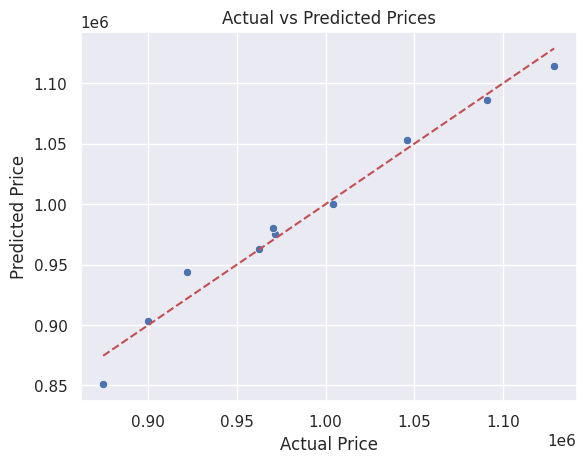

In [43]:
df['PredictedPrice'] = model.predict(X)

sns.scatterplot(x=y, y=df['PredictedPrice'])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.show()

In [50]:
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

GrLivArea: 148.37
GarageArea: 98.79
TotalBsmtSF: 122.20
OverallQual: 2824.71
YearBuilt: 122.79


In [ ]:
# y = X*theta + beta

In [22]:
X = df["GrLivArea"]
y = df["SalePrice"]

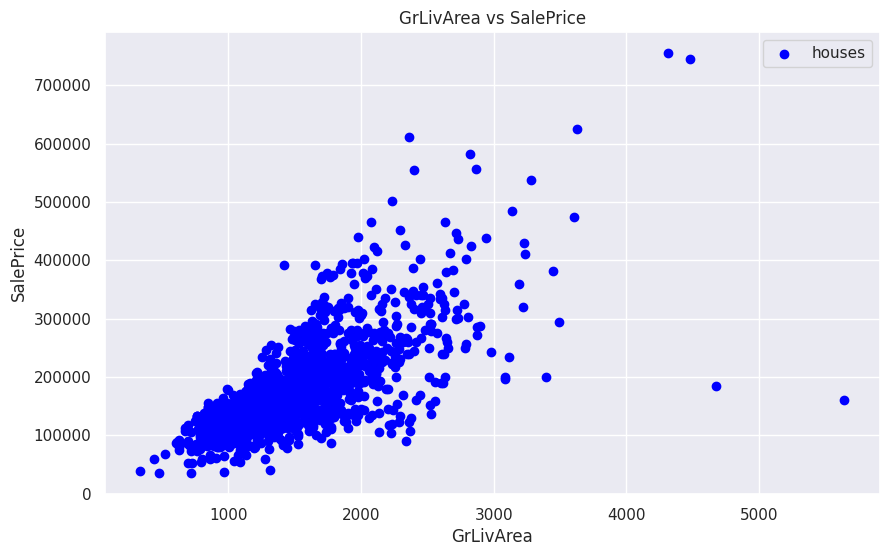

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='houses')
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

In [24]:
X = df['GrLivArea'].values
y = df['SalePrice'].values

X_scaled = (X - np.mean(X)) / np.std(X)

X_b = np.c_[np.ones((X.shape[0], 1)), X_scaled]  # Add a column of ones to X for the intercept term

In [ ]:
# y = X*theta

$$
y = \theta_0 + \theta_1 X_1 + \theta_2 X_2 + \dots + \theta_n X_n
$$

$$
y = \theta X
$$

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( y_i - X_i \theta \right)^2
$$

Let's implement the Gradient descent algo. We apply the ideas from the

*   [Deep ML Problem 15](https://www.deep-ml.com/problems/15?from=Machine%20Learning) [differs in the loss function]
*   [Deep ML Problem 47](https://www.deep-ml.com/problems/47?from=Machine%20Learning) [But the ml task skips the bias predictions, thereby simplifies the model]

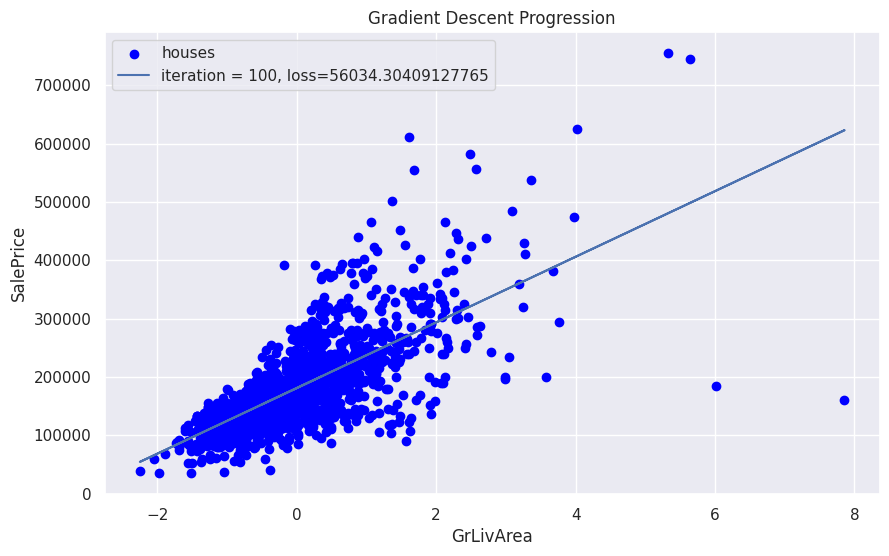

In [28]:
n_iterations = 100
lr = 0.05
theta = [0, 1]
losses = []

for iteration in range(n_iterations+1):
    clear_output(wait=True)

    y_pred = X_b.dot(theta)
    gradients = (2/len(y)) * X_b.T.dot(y_pred - y)
    theta -= lr * gradients

    loss = np.mean((y_pred - y) ** 2)**0.5
    losses.append(loss)

    if iteration%10 == 0:
        plt.figure(figsize=(10, 6))
        plt.scatter(X_b[:, 1], y, color='blue', label='houses')
        plt.plot(X_b[:, 1], y_pred, label=f'iteration = {iteration}, loss={loss}')

        plt.title('Gradient Descent Progression')
        plt.xlabel('GrLivArea')
        plt.ylabel('SalePrice')
        plt.legend()
        plt.show()



<ipython-input-29-ee1ccf0e8ddd>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


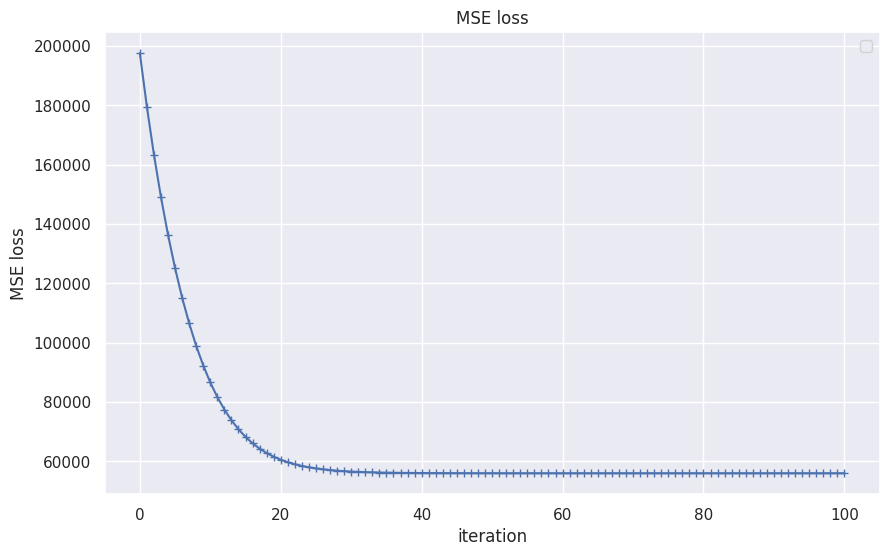

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(losses, '-+')

plt.title('MSE loss')
plt.xlabel('iteration')
plt.ylabel('MSE loss')
plt.legend()
plt.show()

# About outliners

In [32]:
X_new = np.hstack((X, 2000))
y_new = np.hstack((y, 7_000_000))

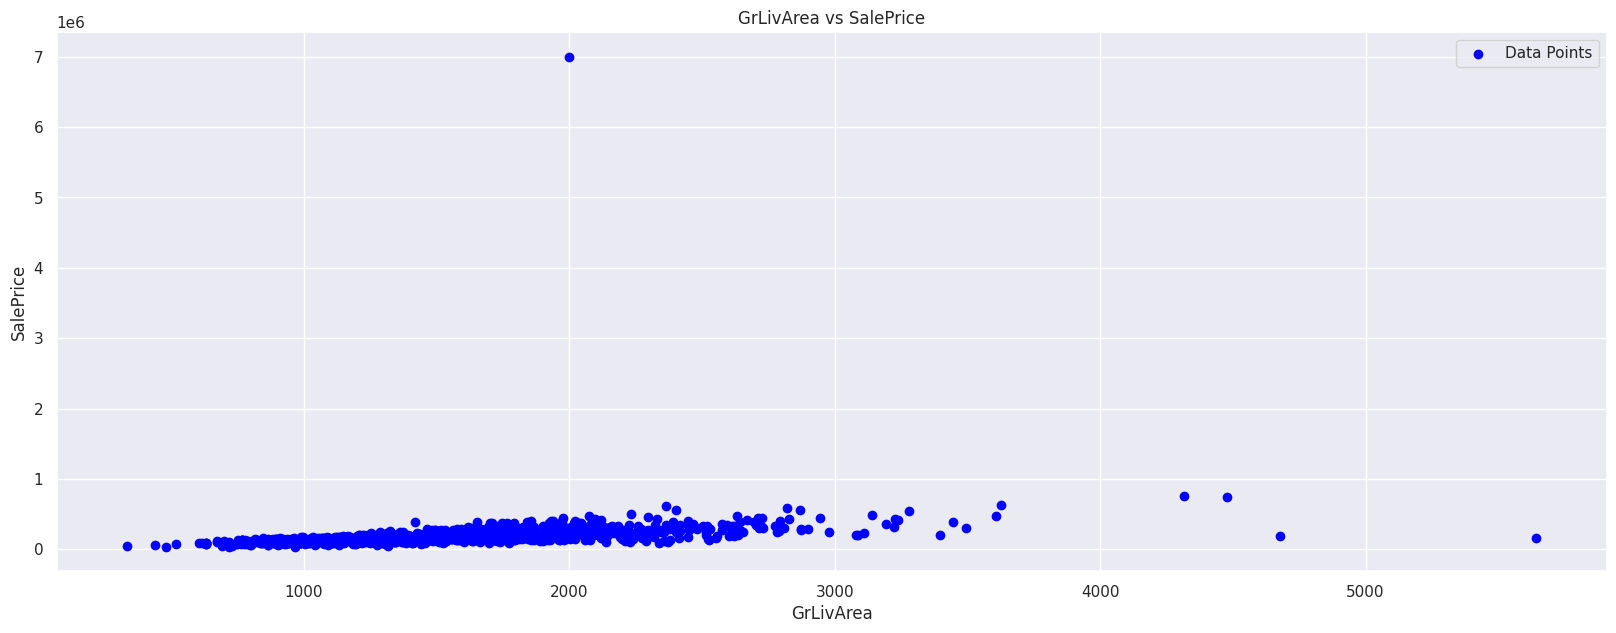

In [33]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.scatter(X_new, y_new, color='blue', label='Data Points')
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

In [ ]:
10%
20%
100%

In [34]:
X = X_new
y = y_new

X_scaled = (X - np.mean(X)) / np.std(X)

# Add a bias term (intercept) to X
X_b = np.c_[np.ones((X.shape[0], 1)), X_scaled]  # Add a column of ones to X for the intercept term

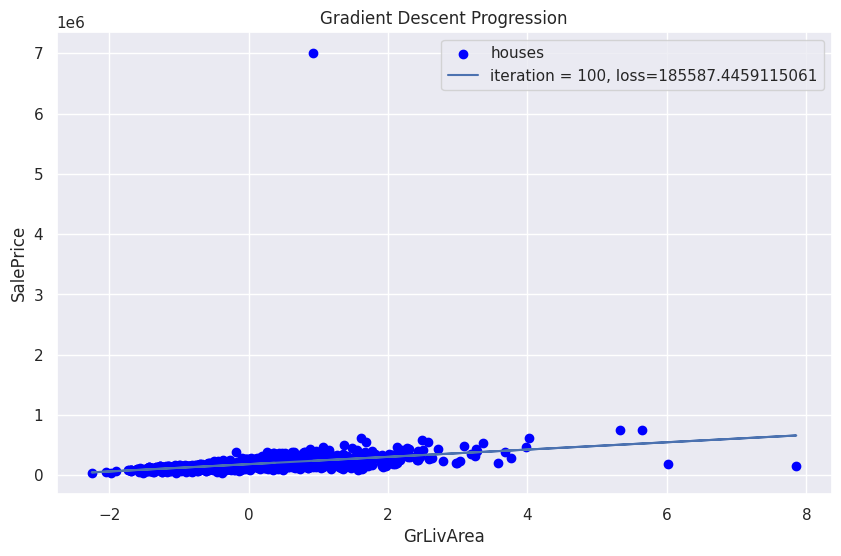

In [35]:
n_iterations = 100
lr = 0.05
theta = [0, 1]
losses = []

for iteration in range(n_iterations+1):
    clear_output(wait=True)

    y_pred = X_b.dot(theta)
    gradients = (2/len(y)) * X_b.T.dot(y_pred - y)
    theta -= lr * gradients

    loss = np.mean((y_pred - y) ** 2)**0.5
    losses.append(loss)

    if iteration%10 == 0:
        plt.figure(figsize=(10, 6))
        plt.scatter(X_b[:, 1], y, color='blue', label='houses')
        plt.plot(X_b[:, 1], y_pred, label=f'iteration = {iteration}, loss={loss}')

        plt.title('Gradient Descent Progression')
        plt.xlabel('GrLivArea')
        plt.ylabel('SalePrice')
        plt.legend()
        plt.show()



In [36]:
losses[-1]

np.float64(185587.4459115061)

In [37]:
prev_loss = 56000
current_loss = 185587
current_loss/prev_loss*100

331.40535714285716

# Linear Regression and Data Preparation for Linear Regression

In [ ]:
df = df.drop(columns=["Id"])

X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Pearson correlation coefficient

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(y_train)
plt.title(f"target")
plt.legend()
plt.show()

In [ ]:
numeric_data = X_train.select_dtypes([np.number])
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data.mean())
X_test = X_test.fillna(numeric_data.mean())

correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)

In [ ]:
correlations

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.barplot(y=correlations.index, x=correlations)
plt.show()

In [ ]:
## Lets look at some examples

In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df["OverallQual"], df["SalePrice"], color='blue', label='houses')
plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df["MoSold"], df["SalePrice"], color='blue', label='houses')
plt.title('MoSold vs SalePrice')
plt.xlabel('MoSold')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

overfitting and underfitting

In [2]:
from sklearn.linear_model import LinearRegression

np.random.seed(36)
x = np.linspace(0, 1, 100)
y = np.cos(1.5 * np.pi * x)

x_objects = np.random.uniform(0, 1, size=30)
y_objects = np.cos(1.5 * np.pi * x_objects) + np.random.normal(scale=0.1, size=x_objects.shape)

from sklearn.preprocessing import PolynomialFeatures
fig, axs = plt.subplots(figsize=(16, 4), ncols=3)
for i, degree in enumerate([1, 4, 20]):
    X_objects = PolynomialFeatures(degree, include_bias=False).fit_transform(x_objects[:, None])
    X = PolynomialFeatures(degree, include_bias=False).fit_transform(x[:, None])
    regr = LinearRegression().fit(X_objects, y_objects)
    y_pred = regr.predict(X)
    axs[i].plot(x, y, label="Real function")
    axs[i].scatter(x_objects, y_objects, label="Data")
    axs[i].plot(x, y_pred, label="Prediction")
    if i == 0:
        axs[i].legend()
    axs[i].set_title("Degree = %d" % degree)
    axs[i].set_xlabel("$x$")
    axs[i].set_ylabel("$f(x)$")
    axs[i].set_ylim(-2, 2)

NameError: name 'plt' is not defined

## Ridge

https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Ridge.html


LinearRegression:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( y_i - X_i \theta \right)^2
$$

Ridge
$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( y_i - X_i \theta \right)^2 + \lambda \sum_{j=1}^{n} \theta_j^2
$$

In [ ]:
model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

### Best constant

In [ ]:
best_constant = y_train.mean()
print("Test RMSE with best constant = %.4f" % mean_squared_error(y_test, best_constant * np.ones(y_test.shape),
                                                                 squared=False))
print("Train RMSE with best constant = %.4f" % mean_squared_error(y_train, best_constant * np.ones(y_train.shape),
                                                                  squared=False))

### Cross-validation

https://scikit-learn.org/stable/modules/cross_validation.html

https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.KFold.html

#### KFold

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# Example from docs
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)
print(kf)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

In [ ]:
cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=10, scoring="neg_root_mean_squared_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

In [ ]:
model.coef_

In [ ]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

$$
y = \theta_0 + \theta_1 X_1 + \theta_2 X_2 + \dots + \theta_n X_n
$$

In [ ]:
# y = 10*X_1 + 10000*X_2

In [ ]:
# X_1 = [10000,10000, 10000,]
# X_2 = [0.1, 0.1, 0.1, 0.1, 0.1,]

In [ ]:
show_weights(numeric_features, model.coef_, X_train[numeric_features].std())

### Using Scaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

In [ ]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, model.coef_, scales)

### Find hyperparameters

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/grid_search.html#grid-search


In [ ]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

### Pipelines

In [ ]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

## Categorical features

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
https://scikit-learn.org/0.20/modules/generated/sklearn.preprocessing.OrdinalEncoder.html




In [ ]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [ ]:
# ["dog", "cat", "dog", "dog"]

In [ ]:
# "dog", "cat"
# X_cat = [0, 1, 0, 0]
# X_dog = [1, 0, 1, 1]

In [ ]:
# [0, 1, 0, 0]

In [ ]:
# cat - 1
# dog - 0

In [ ]:
X_train[categorical].sample(5)

### Lasso


$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( y_i - X_i \theta \right)^2 + \lambda \sum_{j=1}^{n} |\theta_j|
$$

In [ ]:
pipeline

In [ ]:
column_transformer

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='first'), categorical),
    ('scaling', StandardScaler(), list(numeric_features))
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

In [ ]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

In [ ]:
from sklearn.linear_model import Lasso

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

In [ ]:
pipeline

In [ ]:
# pipeline.steps[-1][-1].coef_

In [ ]:
lasso_pipeline.steps[-1][-1].coef_

In [ ]:
ridge_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
lasso_zeros = np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

In [ ]:
alphas = np.logspace(-2, 4, 20)
searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

In [ ]:
# pipeline.steps[-1][-1].coef_

In [ ]:
lasso_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Lasso:", lasso_zeros)